In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
os.chdir("/Users/saeed/Library/CloudStorage/OneDrive-DalhousieUniversity/0- Dalhousie University - Saeed/plotting")

In [5]:
os.listdir("/Users/saeed/Library/CloudStorage/OneDrive-DalhousieUniversity/0- Dalhousie University - Saeed/plotting/data")

['1110022201_databaseLoadingData.csv']

In [6]:
df = pd.read_csv("data/1110022201_databaseLoadingData.csv")
remove = ["DGUID", 'DGUID', 'UOM', 'UOM_ID', 
          'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 
          'COORDINATE', 'STATUS', 'SYMBOL', 
          'TERMINATED', 'DECIMALS']
df.drop(columns=remove, inplace=True)
df.rename(columns={"REF_DATE":'Year'}, inplace=True)
df.head()

,Year,GEO,Statistic,"Household expenditures, summary-level categories",VALUE
0,2010,Canada,Average expenditure per household,Total expenditure,72075
1,2011,Canada,Average expenditure per household,Total expenditure,73646
2,2012,Canada,Average expenditure per household,Total expenditure,75695
3,2013,Canada,Average expenditure per household,Total expenditure,79098
4,2014,Canada,Average expenditure per household,Total expenditure,80727


In [23]:
df[df['Household expenditures, summary-level categories'] == "Total expenditure"]

,Year,GEO,Statistic,"Household expenditures, summary-level categories",VALUE
0,2010,Canada,Average expenditure per household,Total expenditure,72075
1,2011,Canada,Average expenditure per household,Total expenditure,73646
2,2012,Canada,Average expenditure per household,Total expenditure,75695
3,2013,Canada,Average expenditure per household,Total expenditure,79098
4,2014,Canada,Average expenditure per household,Total expenditure,80727
...,...,...,...,...,...
205,2015,British Columbia,Average expenditure per household,Total expenditure,85712
206,2016,British Columbia,Average expenditure per household,Total expenditure,85845
207,2017,British Columbia,Average expenditure per household,Total expenditure,92804
208,2019,British Columbia,Average expenditure per household,Total expenditure,102091


In [7]:
pivot_df = df.pivot(index='Year', columns=['GEO', 'Household expenditures, summary-level categories'], values='VALUE')
pivot_df.head()

GEO                                                         Canada  \
Household expenditures, summary-level categories Total expenditure   
Year                                                                 
2010                                                         72075   
2011                                                         73646   
2012                                                         75695   
2013                                                         79098   
2014                                                         80727   

GEO                                                                 \
Household expenditures, summary-level categories Food expenditures   
Year                                                                 
2010                                                          7850   
2011                                                          7791   
2012                                                          7760   
2013                                                          7934   
2014                                                          8109   

GEO                                              Newfoundland and Labrador  \
Household expenditures, summary-level categories         Total expenditure   
Year                                                                         
2010                                                                 62430   
2011                                                                 66377   
2012                                                                 70193   
2013                                                                 75489   
2014                                                                 77339   

GEO                                                                 \
Household expenditures, summary-level categories Food expenditures   
Year                                                                 
2010                                                          7591   
2011                                                          7749   
2012                                                          7830   
2013                                                          7939   
2014                                                          8489   

GEO                                              Prince Edward Island  \
Household expenditures, summary-level categories    Total expenditure   
Year                                                                    
2010                                                            59534   
2011                                                            61328   
2012                                                            67346   
2013                                                            63348   
2014                                                            68358   

GEO                                                                 \
Household expenditures, summary-level categories Food expenditures   
Year                                                                 
2010                                                          7382   
2011                                                          7276   
2012                                                          7290   
2013                                                          6978   
2014                                                          7388   

GEO                                                    Nova Scotia  \
Household expenditures, summary-level categories Total expenditure   
Year                                                                 
2010                                                         61939   
2011                                                         67037   
2012                                                         68111   
2013                                                         68795   
2014                                                    

In [8]:
# For each province, calculate (Food expenditures / Total expenditures) * 100
for province in pivot_df.columns.get_level_values(0).unique():
    pivot_df[(province, 'Food Share (%)')] = (pivot_df[(province, 'Food expenditures')] / pivot_df[(province, 'Total expenditure')]) * 100

# Sort the columns so it's clean (optional)
pivot_df = pivot_df.sort_index(axis=1)

pivot_df.head()

GEO                                                     Alberta  \
Household expenditures, summary-level categories Food Share (%)   
Year                                                              
2010                                                   9.976762   
2011                                                   9.585942   
2012                                                   8.684937   
2013                                                   9.217847   
2014                                                   8.657237   

GEO                                                                 \
Household expenditures, summary-level categories Food expenditures   
Year                                                                 
2010                                                          8887   
2011                                                          8559   
2012                                                          8458   
2013                                                          9328   
2014                                                          8740   

GEO                                                                 \
Household expenditures, summary-level categories Total expenditure   
Year                                                                 
2010                                                         89077   
2011                                                         89287   
2012                                                         97387   
2013                                                        101195   
2014                                                        100956   

GEO                                              British Columbia  \
Household expenditures, summary-level categories   Food Share (%)   
Year                                                                
2010                                                    11.667402   
2011                                                    10.799777   
2012                                                    11.123708   
2013                                                    10.295367   
2014                                                    10.173814   

GEO                                                                 \
Household expenditures, summary-level categories Food expenditures   
Year                                                                 
2010                                                          8732   
2011                                                          8121   
2012                                                          8438   
2013                                                          8118   
2014                                                          8218   

GEO                                                                 \
Household expenditures, summary-level categories Total expenditure   
Year                                                                 
2010                                                         74841   
2011                                                         75196   
2012                                                         75856   
2013                                                         78851   
2014                                                         80776   

GEO                                                      Canada  \
Household expenditures, summary-level categories Food Share (%)   
Year                                                              
2010                                                  10.891433   
2011                                                  10.578986   
2012                                                  10.251668   
2013                                                  10.030595   
2014                                                  10.044966   

GEO                                                                 \
Household expenditures, summary-level categories Food expen

In [9]:
pivot_df.columns

MultiIndex([(                  'Alberta',    'Food Share (%)'),
            (                  'Alberta', 'Food expenditures'),
            (                  'Alberta', 'Total expenditure'),
            (         'British Columbia',    'Food Share (%)'),
            (         'British Columbia', 'Food expenditures'),
            (         'British Columbia', 'Total expenditure'),
            (                   'Canada',    'Food Share (%)'),
            (                   'Canada', 'Food expenditures'),
            (                   'Canada', 'Total expenditure'),
            (                 'Manitoba',    'Food Share (%)'),
            (                 'Manitoba', 'Food expenditures'),
            (                 'Manitoba', 'Total expenditure'),
            (            'New Brunswick',    'Food Share (%)'),
            (            'New Brunswick', 'Food expenditures'),
            (            'New Brunswick', 'Total expenditure'),
            ('Newfoundland and Labrador'

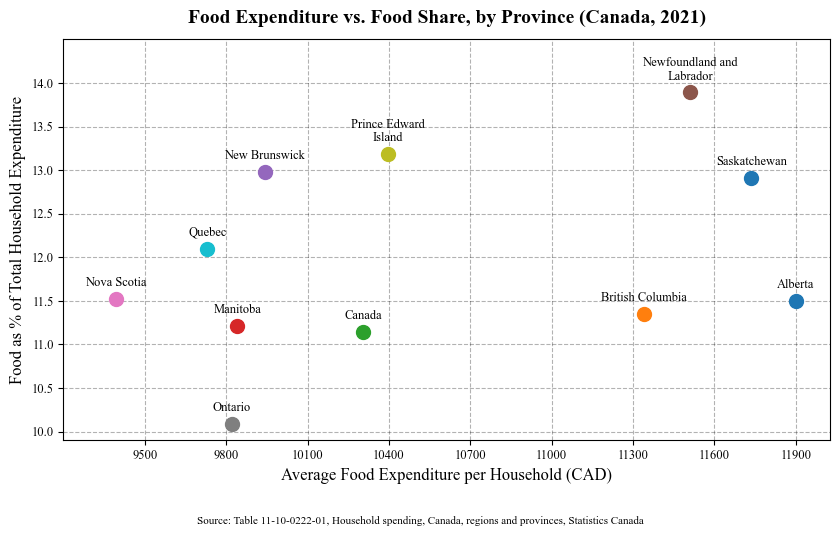

In [251]:
pivot_df.rename(columns={"Newfoundland and Labrador":"Newfoundland and\nLabrador"}, level=0, inplace=True)
pivot_df.rename(columns={"Prince Edward Island":"Prince Edward\nIsland"}, level=0, inplace=True)

# Create a list of provinces (exclude 'Canada' if you want only provinces)
provinces = [p for p in pivot_df.columns.get_level_values(0).unique()]

STANDARD_PLOT_WIDTH = 8.5  # inches
STANDARD_PLOT_HEIGHT = 5.04  # inches

# Create the scatter plot
plt.figure(figsize=(STANDARD_PLOT_WIDTH, STANDARD_PLOT_HEIGHT))


for province in provinces:
    x = pivot_df.loc[2021][(province, 'Food expenditures')]#.values[-1]  # latest year (you can change to .iloc[-1])
    y = pivot_df.loc[2021][(province, 'Food Share (%)')]#.values[-1]
    plt.scatter(x, y, s=100, zorder=3)
    plt.text(x, y+0.15, province, fontsize=9, ma='center', ha='center', 
             fontname="Times New Roman",weight='medium')  # label the points

# Set plot titles and labels
plt.title('Food Expenditure vs. Food Share, by Province (Canada, 2021)',
          #'Food spending vs. share of total spending by province, 2021',
          fontsize=14, fontname='Times New Roman', pad=12, weight='bold')
plt.xlabel('Average Food Expenditure per Household (CAD)', fontsize=12, 
           fontname='Times New Roman', weight='medium')
plt.ylabel('Food as % of Total Household Expenditure', fontsize=12, 
           fontname='Times New Roman', weight='medium')

plt.grid(ls = '--', c='k', alpha=0.3, )
plt.xticks(list(np.arange(9500,12200,300)),
           list(np.arange(9500,12200,300)),
           weight='medium', fontname='Times New Roman', fontsize=9)
plt.yticks(np.arange(10,14.4,0.5),np.arange(10,14.4,0.5),
           weight='medium', fontname='Times New Roman', fontsize=9)

plt.xlim(left=9200)
plt.ylim(top=14.5)
plt.tight_layout()

plt.figtext(0.5, -0.05,
            'Source: Table 11-10-0222-01, Household spending, Canada, regions and provinces, Statistics Canada',
            wrap=True, horizontalalignment='center', fontsize=8, fontname='Times New Roman', weight='medium')

# Show plot

#plt.savefig('food_exp_2021_0.png', dpi=500, 
            #transparent=True, 
#            bbox_inches='tight')
plt.show()

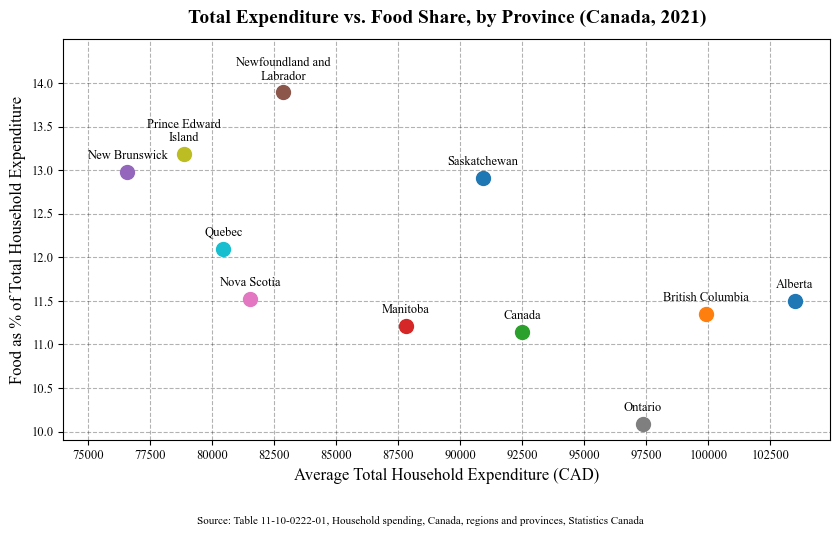

In [14]:
pivot_df.rename(columns={"Newfoundland and Labrador":"Newfoundland and\nLabrador"}, level=0, inplace=True)
pivot_df.rename(columns={"Prince Edward Island":"Prince Edward\nIsland"}, level=0, inplace=True)

#ax = plt.gca()           # grab current axes
#ax.set_axisbelow(True)   # put grid/ticks beneath all plot elements
# Create a list of provinces (exclude 'Canada' if you want only provinces)
provinces = [p for p in pivot_df.columns.get_level_values(0).unique()]

STANDARD_PLOT_WIDTH = 8.5  # inches
STANDARD_PLOT_HEIGHT = 5.04  # inches

# Create the scatter plot
plt.figure(figsize=(STANDARD_PLOT_WIDTH, STANDARD_PLOT_HEIGHT))


for province in provinces:
    x = pivot_df.loc[2021][(province, 'Total expenditure')]#.values[-1]  # latest year (you can change to .iloc[-1])
    y = pivot_df.loc[2021][(province, 'Food Share (%)')]#.values[-1]
    plt.scatter(x, y, s=100, zorder=3)
    plt.text(x, y+0.15, province, fontsize=9, ma='center', ha='center', 
             fontname="Times New Roman",weight='medium')  # label the points

# Set plot titles and labels
plt.title('Total Expenditure vs. Food Share, by Province (Canada, 2021)',
          fontsize=14, fontname='Times New Roman', pad=12, weight='bold')
plt.xlabel('Average Total Household Expenditure (CAD)', fontsize=12, 
           fontname='Times New Roman', weight='medium')
plt.ylabel('Food as % of Total Household Expenditure', fontsize=12, 
           fontname='Times New Roman', weight='medium')
#plt.gca().xaxis.set_major_formatter(lambda x, _: f'{x/1000:.0f}k')
plt.grid(ls = '--', c='k', alpha=0.3, )
plt.xticks(list(np.arange(75000,105000,2500)),
           list(np.arange(75000,105000,2500)),
           weight='medium', fontname='Times New Roman', fontsize=9)
plt.yticks(np.arange(10,14.4,0.5),np.arange(10,14.4,0.5),
           weight='medium', fontname='Times New Roman', fontsize=9)

plt.xlim(left=74000, right=104900)
plt.ylim(top=14.5)
plt.tight_layout()

plt.figtext(0.5, -0.05,
            'Source: Table 11-10-0222-01, Household spending, Canada, regions and provinces, Statistics Canada',
            wrap=True, horizontalalignment='center', fontsize=8, fontname='Times New Roman', weight='medium')

# Show plot

#plt.savefig('food_exp_2021_on_total_0.png', dpi=500, 
#            #transparent=True, 
#            bbox_inches='tight')
plt.show()

In [20]:
pivot_df.loc[2021][('Ontario', 'Food Share (%)')]

np.float64(10.088642829996816)

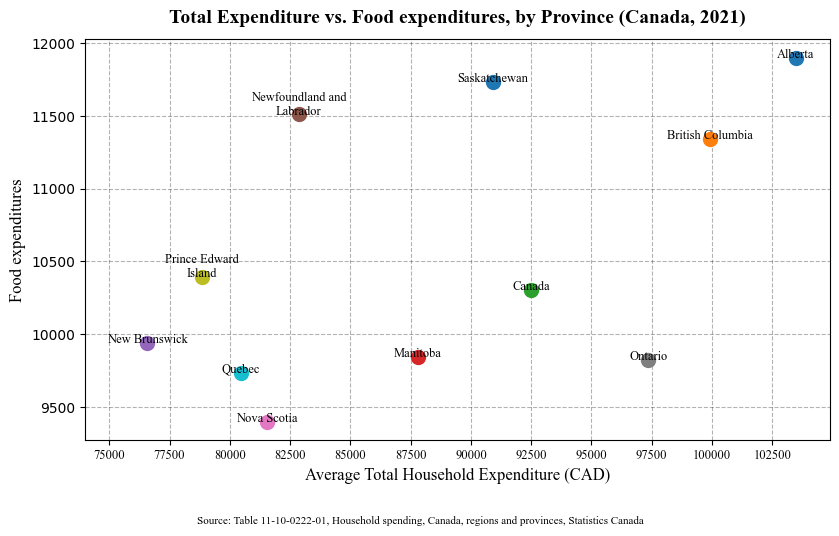

In [11]:
pivot_df.rename(columns={"Newfoundland and Labrador":"Newfoundland and\nLabrador"}, level=0, inplace=True)
pivot_df.rename(columns={"Prince Edward Island":"Prince Edward\nIsland"}, level=0, inplace=True)

#ax = plt.gca()           # grab current axes
#ax.set_axisbelow(True)   # put grid/ticks beneath all plot elements
# Create a list of provinces (exclude 'Canada' if you want only provinces)
provinces = [p for p in pivot_df.columns.get_level_values(0).unique()]

STANDARD_PLOT_WIDTH = 8.5  # inches
STANDARD_PLOT_HEIGHT = 5.04  # inches

# Create the scatter plot
plt.figure(figsize=(STANDARD_PLOT_WIDTH, STANDARD_PLOT_HEIGHT))


for province in provinces:
    x = pivot_df.loc[2021][(province, 'Total expenditure')]#.values[-1]  # latest year (you can change to .iloc[-1])
    y = pivot_df.loc[2021][(province, 'Food expenditures')]#.values[-1]
    plt.scatter(x, y, s=100, zorder=3)
    plt.text(x, y+0.15, province, fontsize=9, ma='center', ha='center', 
             fontname="Times New Roman",weight='medium')  # label the points

# Set plot titles and labels
plt.title('Total Expenditure vs. Food expenditures, by Province (Canada, 2021)',
          fontsize=14, fontname='Times New Roman', pad=12, weight='bold')
plt.xlabel('Average Total Household Expenditure (CAD)', fontsize=12, 
           fontname='Times New Roman', weight='medium')
plt.ylabel('Food expenditures', fontsize=12, 
           fontname='Times New Roman', weight='medium')
#plt.gca().xaxis.set_major_formatter(lambda x, _: f'{x/1000:.0f}k')
plt.grid(ls = '--', c='k', alpha=0.3, )
plt.xticks(list(np.arange(75000,105000,2500)),
           list(np.arange(75000,105000,2500)),
           weight='medium', fontname='Times New Roman', fontsize=9)
#plt.yticks(np.arange(10,14.4,0.5),np.arange(10,14.4,0.5),
#           weight='medium', fontname='Times New Roman', fontsize=9)

plt.xlim(left=74000, right=104900)
#plt.ylim(top=14.5)
plt.tight_layout()

plt.figtext(0.5, -0.05,
            'Source: Table 11-10-0222-01, Household spending, Canada, regions and provinces, Statistics Canada',
            wrap=True, horizontalalignment='center', fontsize=8, fontname='Times New Roman', weight='medium')

# Show plot

#plt.savefig('food_exp_2021_on_total_0.png', dpi=500, 
#            #transparent=True, 
#            bbox_inches='tight')
plt.show()

In [21]:
dd = pd.read_csv("/Users/saeed/Library/CloudStorage/OneDrive-DalhousieUniversity/0- Dalhousie University - Saeed/0- Research/RA - Finance/Textual Analysis/Textual Analysis Code/May5/data/input/id2firms.csv")
dd.head()

,File Name,gvkey,year
0,US6045672069-Q4-20120815.txt,US6045672069,2012
1,001045-Q1-20080416.txt,001045,2008
2,001045-Q1-20090415.txt,001045,2009
3,001045-Q1-20100421.txt,001045,2010
4,001045-Q1-20110420.txt,001045,2011


In [22]:
dd2 = dd.iloc[:3]
dd2

,File Name,gvkey,year
0,US6045672069-Q4-20120815.txt,US6045672069,2012
1,001045-Q1-20080416.txt,001045,2008
2,001045-Q1-20090415.txt,001045,2009


In [24]:
aa = pd.read_stata("/Users/saeed/Documents/Work/Research_finance/HCD Scores Generated/from Demers_Keywords/HCD Scores Generated Pranto Scores/TF_IDF_EC_Quarterly_2004_2024_ExtendedDict_Final.dta")
aa.head()

,doc,gvkey,year,date,quarter,document_length_ec,compe_bene_tf_ec,dei_tf_ec,demo_others_tf_ec,health_safety_tf_ec,...,labor_culture_weidf_ec,compe_bene_weidf_firm_ec,dei_weidf_firm_ec,demo_others_weidf_firm_ec,health_safety_weidf_firm_ec,labor_culture_weidf_firm_ec,spr1500,top2000_mktcap,crosslisted,russellindex
0,001004-Q3-Mar- 19-2008.txt,001004,2008,20080319,Q3,3456,0,16,19,1,...,30.401339,0.0000,1.0146,0.2342,0.0869,0.8797,y,y,n,y
1,001004-Q4-Jul- 15-2009.txt,001004,2009,20090715,Q4,1839,0,9,4,4,...,0.837836,0.0000,0.8470,0.1363,0.2507,0.0456,y,y,n,y
2,001004-Q1-Sep- 23-2009.txt,001004,2009,20090923,Q1,2003,0,5,11,3,...,2.581368,0.0000,0.4144,0.4490,0.0974,0.1289,y,y,n,y
3,001004-Q3-Mar- 18-2009.txt,001004,2009,20090318,Q3,2497,0,3,8,9,...,8.631179,0.0000,0.4357,0.5469,0.3888,0.3457,y,y,n,y
4,001004-Q2-Dec- 16-2009.txt,001004,2009,20091216,Q2,1807,1,7,1,3,...,2.581368,0.2435,0.3306,0.0834,0.5198,0.1429,y,y,n,y


In [28]:
aa[aa['doc'] == "001045-Q1-20080416.txt"]

,doc,gvkey,year,date,quarter,document_length_ec,compe_bene_tf_ec,dei_tf_ec,demo_others_tf_ec,health_safety_tf_ec,...,labor_culture_weidf_ec,compe_bene_weidf_firm_ec,dei_weidf_firm_ec,demo_others_weidf_firm_ec,health_safety_weidf_firm_ec,labor_culture_weidf_firm_ec,spr1500,top2000_mktcap,crosslisted,russellindex
95,001045-Q1-20080416.txt,001045,2008,20080416,Q1,2071,0,0,16,6,...,13.849941,0.0,0.0,0.6342,0.1756,0.6688,n,y,n,y


In [29]:
for col in aa.columns:
    print(col)
    print(aa.loc[95,col])
    print("")

doc
001045-Q1-20080416.txt

gvkey
001045

year
2008

date
20080416

quarter
Q1

document_length_ec
2071

compe_bene_tf_ec
0

dei_tf_ec
0

demo_others_tf_ec
16

health_safety_tf_ec
6

labor_culture_tf_ec
9

compe_bene_tfidf_ec
0.0

dei_tfidf_ec
0.0

demo_others_tfidf_ec
21.711758

health_safety_tfidf_ec
5.859833

labor_culture_tfidf_ec
20.005487

compe_bene_tf_firm_ec
0.0

dei_tf_firm_ec
0.0

demo_others_tf_firm_ec
0.7726

health_safety_tf_firm_ec
0.2897

labor_culture_tf_firm_ec
0.4346

compe_bene_tfidf_firm_ec
0.0

dei_tfidf_firm_ec
0.0

demo_others_tfidf_firm_ec
1.0484

health_safety_tfidf_firm_ec
0.2829

labor_culture_tfidf_firm_ec
0.966

compe_bene_weidf_ec
0.0

dei_weidf_ec
13.134746

demo_others_weidf_ec
0.0

health_safety_weidf_ec
3.6365044

labor_culture_weidf_ec
13.849941

compe_bene_weidf_firm_ec
0.0

dei_weidf_firm_ec
0.0

demo_others_weidf_firm_ec
0.6342

health_safety_weidf_firm_ec
0.1756

labor_culture_weidf_firm_ec
0.6688

spr1500
n

top2000_mktcap
y

crosslisted
n

russ